In [2]:
import pandas as pd
import matplotlib.pyplot as plt
houses = pd.read_csv("data/kc_house_data.csv")
titanic = pd.read_csv("data/titanic.csv")
titanic["age"]  = pd.to_numeric(titanic.age, errors = "coerce")
nf = pd.read_csv("data/netflix_titles.csv", sep = "|", index_col = 0)
btc =  pd.read_csv("data/coin_Bitcoin.csv")
countries = pd.read_csv("data/world-happiness-report-2021.csv")
countries.set_index("Country name", inplace=  True)
ufo  = pd.read_csv("data/nuforc_reports.csv", parse_dates= ["date_time", "posted"])

In [7]:
houses[["sqft_living", "sqft_lot"]].sort_values("sqft_living", ascending = False).head(10)

,sqft_living,sqft_lot
12777,13540,307752
7252,12050,27600
3914,10040,37325
9254,9890,31374
8092,9640,13068
4411,9200,35069
14556,8670,64033
18302,8020,21738
1164,8010,45517
1448,8000,23985


<Axes: >

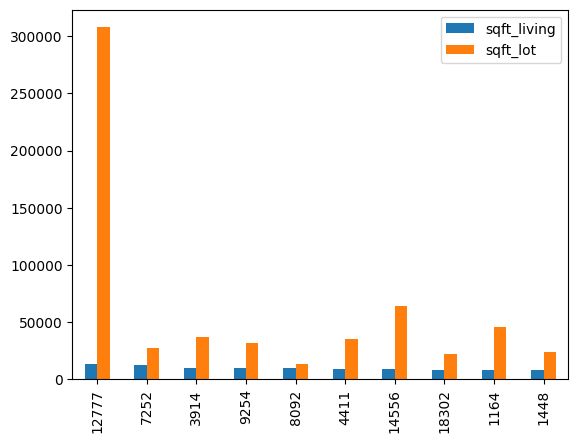

In [8]:
##df plot will plot every single column on the same plot

houses[["sqft_living", "sqft_lot"]].sort_values("sqft_living", ascending = False).head(10).plot(kind = "bar")

<h3> Changing pandas plot style</h3>

<Axes: xlabel='sex'>

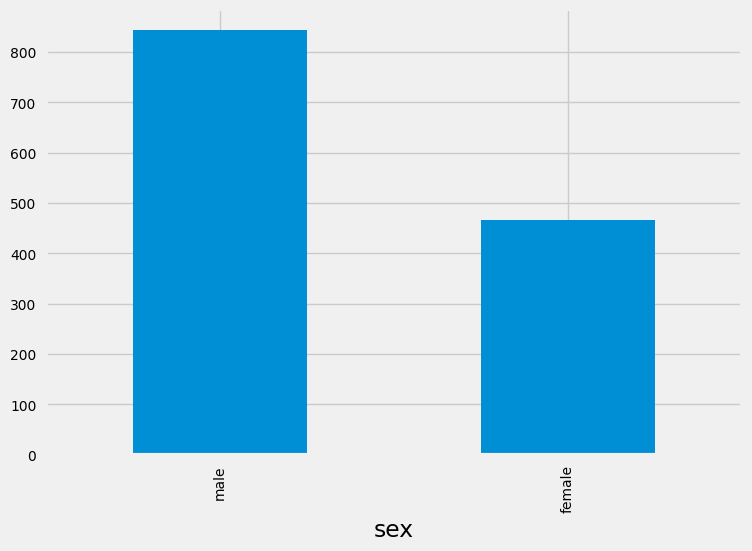

In [13]:
plt.style.use("fivethirtyeight")
titanic.sex.value_counts().plot(kind = "bar")

<h3> Adding titles and labels to pandas plots</h3>

<Axes: title={'center': 'Sex Breakdown'}, xlabel='sex'>

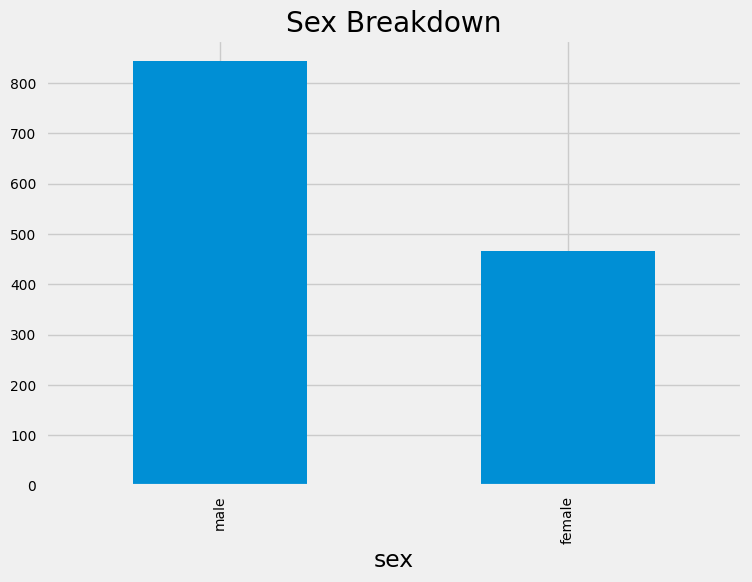

In [15]:
titanic.sex.value_counts().plot(kind = "bar", title = "Sex Breakdown") ## however this will not allow us flexibility such as changing fontsize etc

Text(0.5, 1.0, 'Sex Breakdown')

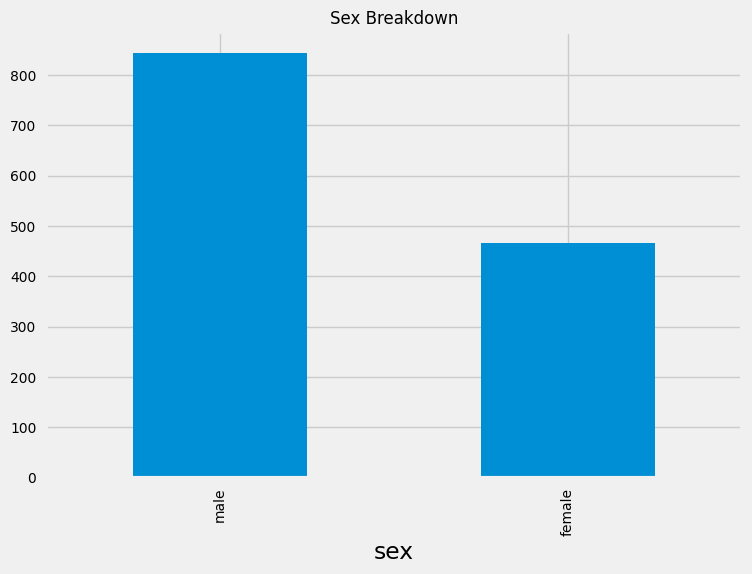

In [16]:
titanic.sex.value_counts().plot(kind = "bar")
plt.title("Sex Breakdown", fontsize = 12)
                                

In [17]:
ufo["month"] = ufo["date_time"].dt.month

<Axes: title={'center': 'ufo sightings'}, xlabel='Month', ylabel='num_sighitings'>

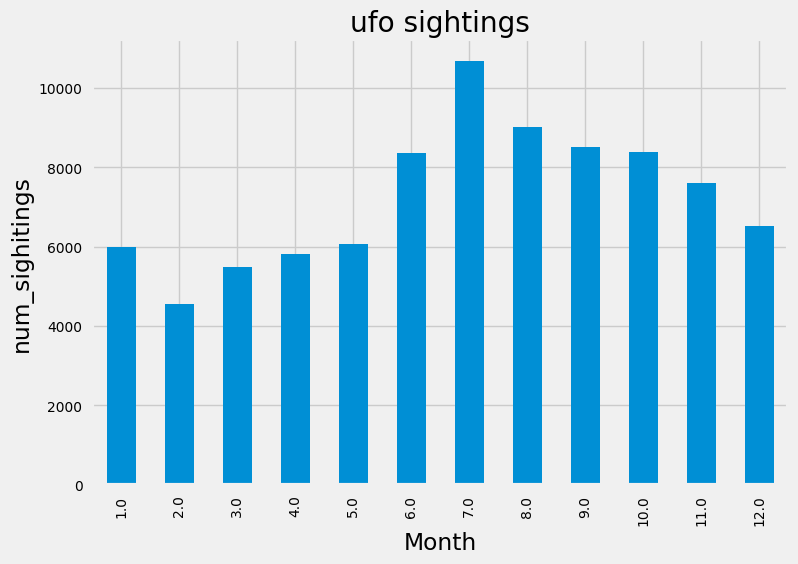

In [23]:
sightings = ufo.month.value_counts().sort_index()
sightings.plot(kind = "bar", title = "ufo sightings", xlabel = "Month", ylabel = "num_sighitings")

<h3> Using rename while plotting </h3>

<Axes: xlabel='month'>

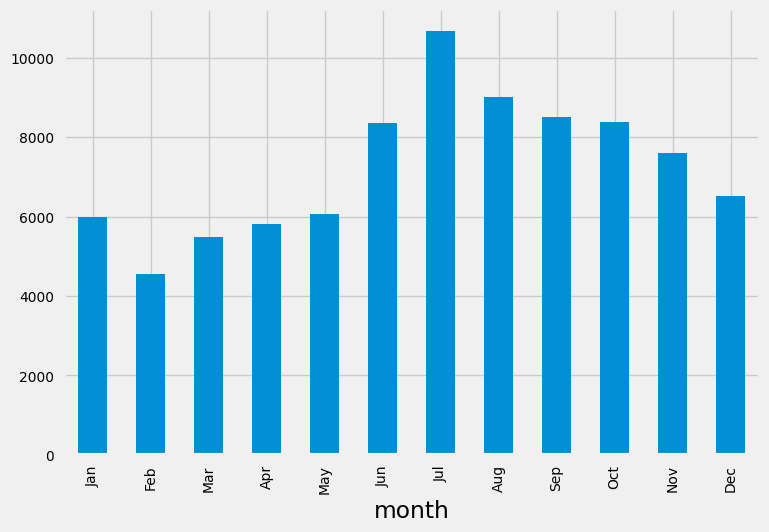

In [26]:
sightings.rename({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5:"May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11:"Nov", 12: "Dec"}, inplace = True)
sightings.plot(kind = "bar")

<h3> Closer look at Pandas Bar Plot </h3>

In [36]:
salaries = pd.read_csv("data/Salaries.csv", low_memory = False) ## this low_memory will ensure that entire file is read in one go and the dtype assignment happens once all the elements of a column are read, unlike when its true, in which case if it encounters int values for first few rows it may assing int and then it may assing object
salaries["BasePay"] = pd.to_numeric(salaries["BasePay"], errors = "coerce").fillna(0)
salaries["OvertimePay"] = pd.to_numeric(salaries["OvertimePay"], errors = "coerce").fillna(0)
salaries["OtherPay"] = pd.to_numeric(salaries["OtherPay"], errors = "coerce").fillna(0)

In [28]:
salaries.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [37]:
salaries.sort_values("TotalPay", ascending = False).head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [38]:
df = salaries[["EmployeeName", "BasePay", "OvertimePay","OtherPay"]]

In [39]:
df.set_index("EmployeeName", inplace = True)

<Axes: xlabel='EmployeeName'>

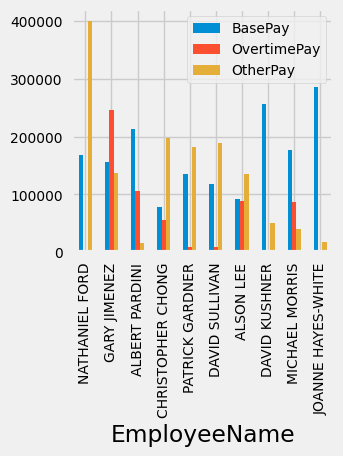

In [43]:
df.head(10).plot(kind = "bar", figsize = (3,3)) ## it will create bars for every column 

<Axes: xlabel='EmployeeName'>

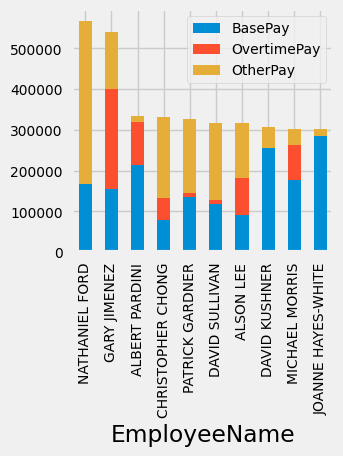

In [44]:
df.head(10).plot(kind = "bar", figsize = (3,3), stacked = True) ## it will create bars for every column 

<Axes: xlabel='EmployeeName'>

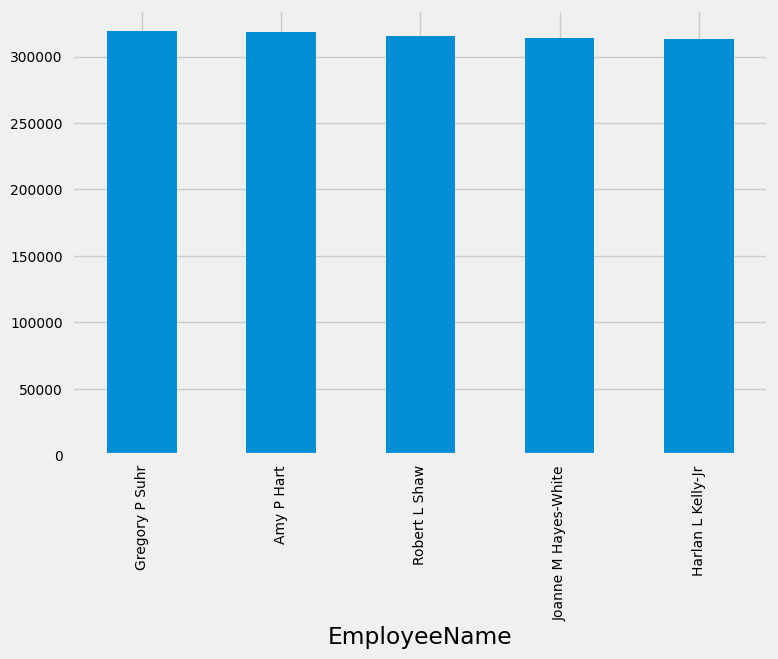

In [45]:
df["BasePay"].sort_values(ascending = False).head().plot(kind = "bar")

<Axes: ylabel='EmployeeName'>

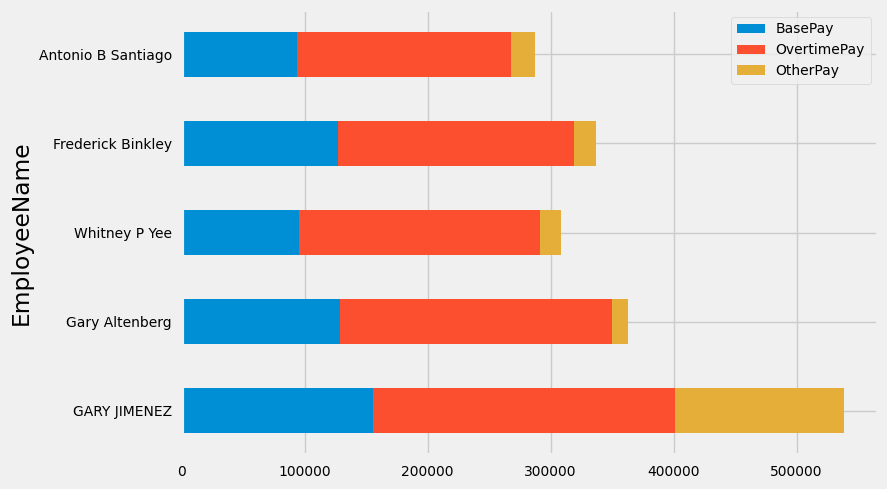

In [47]:
df.sort_values("OvertimePay", ascending = False).head().plot(kind = "barh", stacked  = True)

<h3> Pandas Histogram </h3>

<Axes: ylabel='Frequency'>

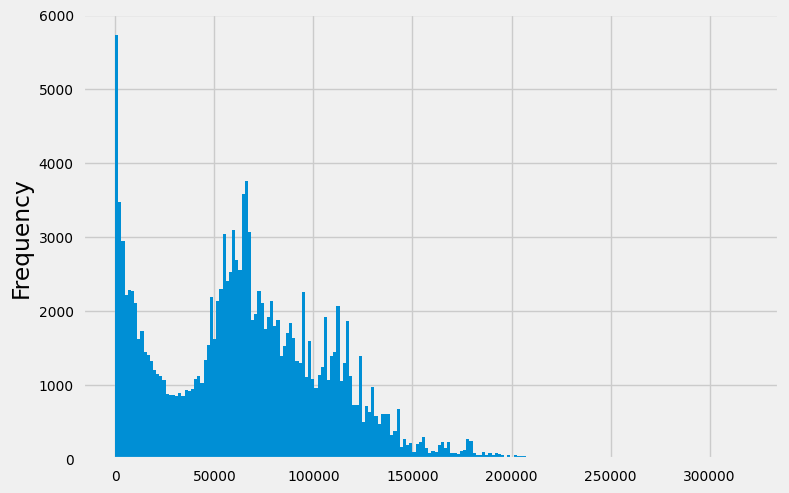

In [50]:
df["BasePay"].plot(kind = "hist", bins = 200)

<Axes: ylabel='Frequency'>

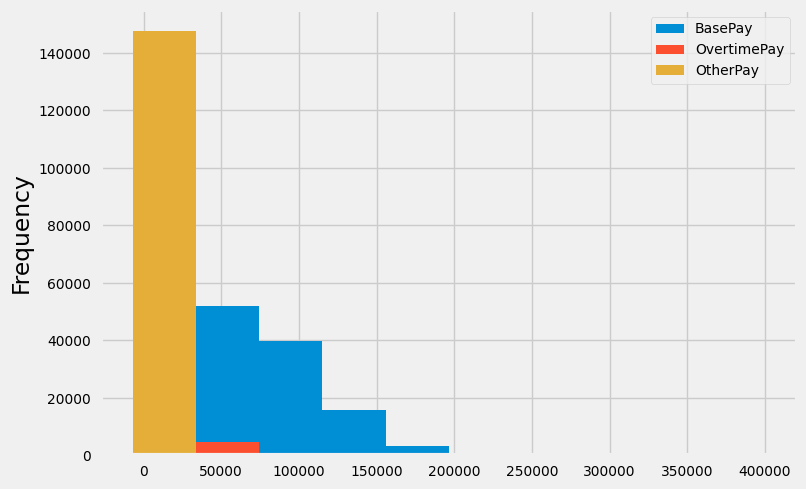

In [51]:
df.plot.hist()

array([[<Axes: title={'center': 'BasePay'}>,
        <Axes: title={'center': 'OvertimePay'}>],
       [<Axes: title={'center': 'OtherPay'}>, <Axes: >]], dtype=object)

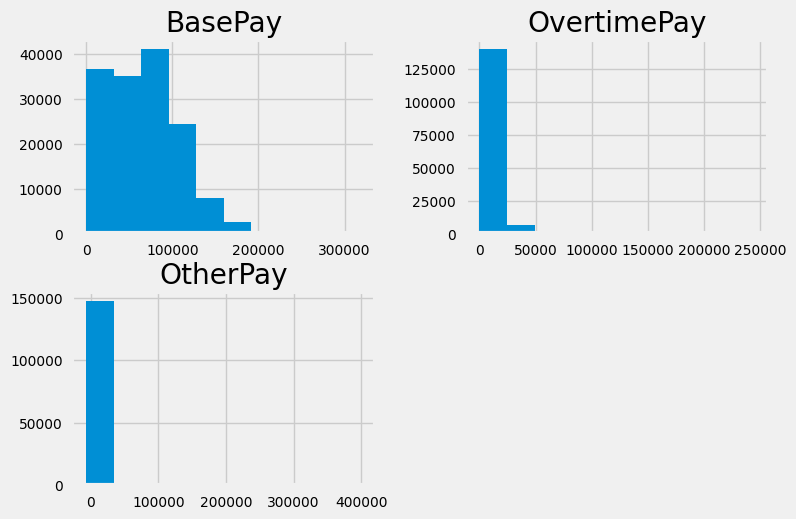

In [52]:
df.hist() ## will give histogram separate for each column

<h3> Box Plots </h3>

A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.

<Axes: >

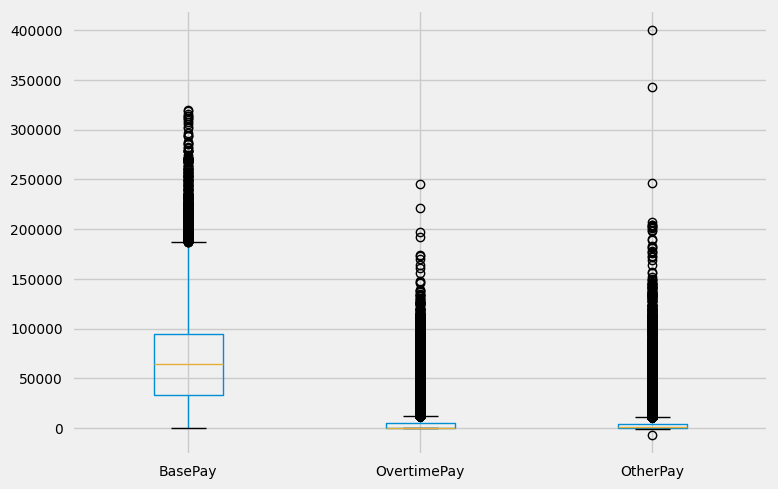

In [53]:
df.boxplot()

<Axes: >

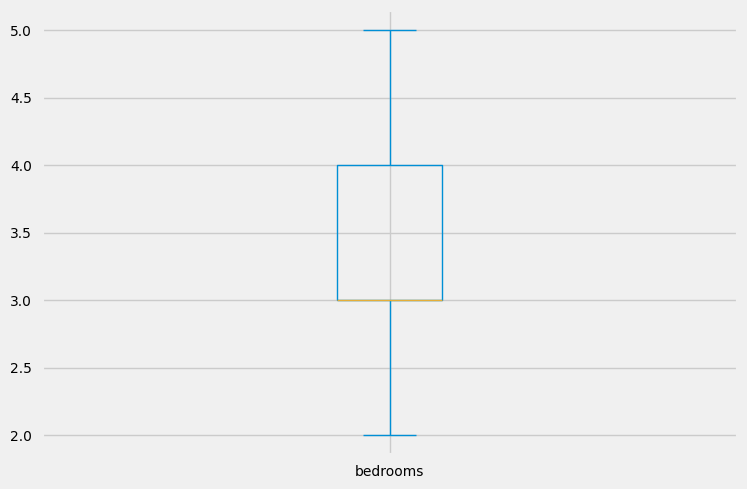

In [55]:
houses.bedrooms.plot(kind = "box", showfliers = False)

<h3> Line Plots </h3>

In [59]:
import datetime as dt

In [60]:
ufo["month"] = ufo["date_time"].dt.month
ufo["year"] = ufo["date_time"].dt.year

In [61]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87888 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84951 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  datetime64[ns]
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
 12  month           86938 non-null  float64       
 13  year            86938 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(8)
memory usa

<Axes: xlabel='year'>

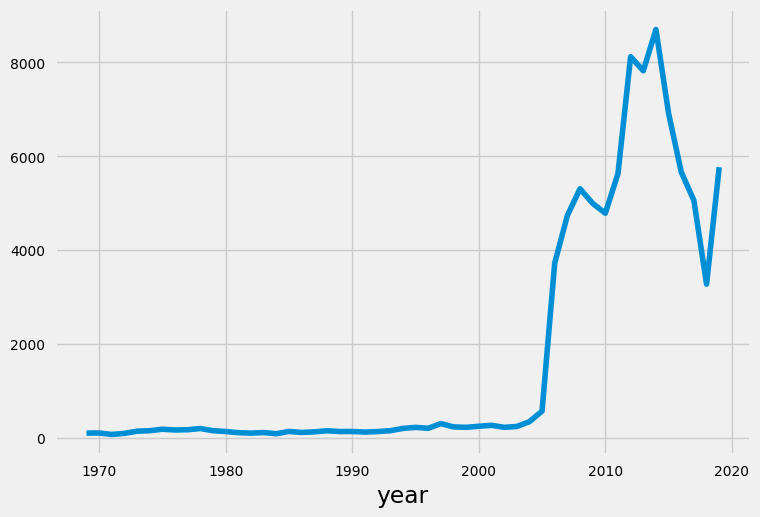

In [67]:
ufo.year.value_counts().sort_index().plot()

<Axes: xlabel='price', ylabel='bedrooms'>

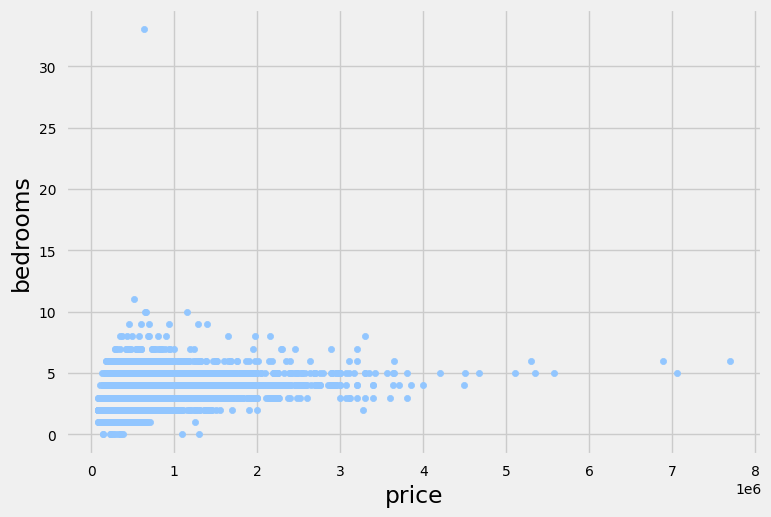

In [70]:
houses.plot.scatter(y = "bedrooms", x = "price")

<h3> Pandas Scatter Plot </h3>

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

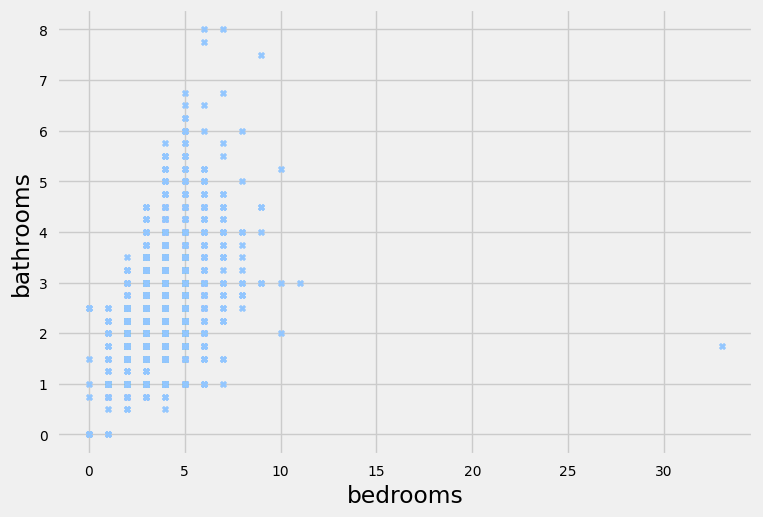

In [73]:
houses.plot.scatter(y = "bathrooms", x = "bedrooms", marker = "X")

<h3> Multiple plots on same axis </h3>

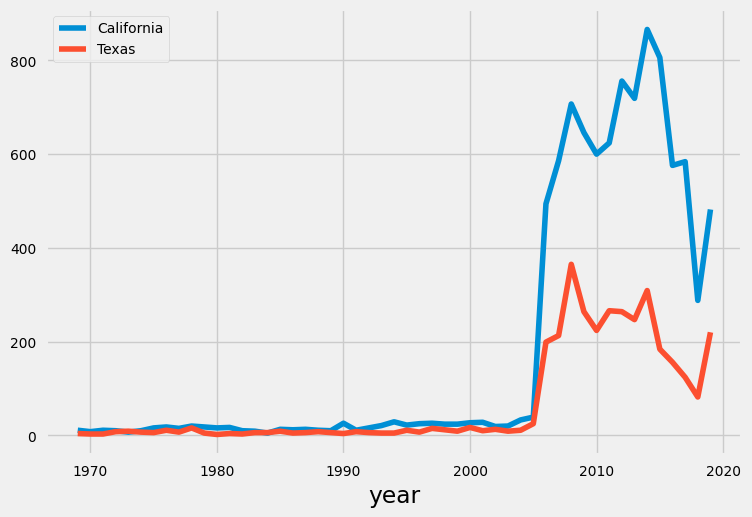

In [85]:
ufo[ufo["state"] == "CA"].year.value_counts().sort_index().plot(label = "California")
ufo[ufo["state"] == "TX"].year.value_counts().sort_index().plot(label = "Texas")
plt.legend(loc = "upper left")

- **Series.plot() behaves like Matplotlib’s plt.plot(), so it reuses the current figure.**
- **DataFrame.plot() assumes you want a new figure unless you explicitly provide ax to reuse an existing one**

<h3> UFO Plotting Challenge</h3>

In [92]:
ufo.head(1)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,month,year
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582,12.0,2019.0


In [96]:
circle = ufo[(ufo["shape"] == "circle") & (ufo["date_time"].between("2000-01-01", "2018-12-31"))].year.value_counts().sort_index()
light = ufo[(ufo["shape"] == "light") & (ufo["date_time"].between("2000-01-01", "2018-12-31"))].year.value_counts().sort_index()
triangle = ufo[(ufo["shape"] == "triangle") & (ufo["date_time"].between("2000-01-01", "2018-12-31"))].year.value_counts().sort_index()
fireball= ufo[(ufo["shape"] == "fireball") & (ufo["date_time"].between("2000-01-01", "2018-12-31"))].year.value_counts().sort_index()
formation = ufo[(ufo["shape"] == "formation") & (ufo["date_time"].between("2000-01-01", "2018-12-31"))].year.value_counts().sort_index()

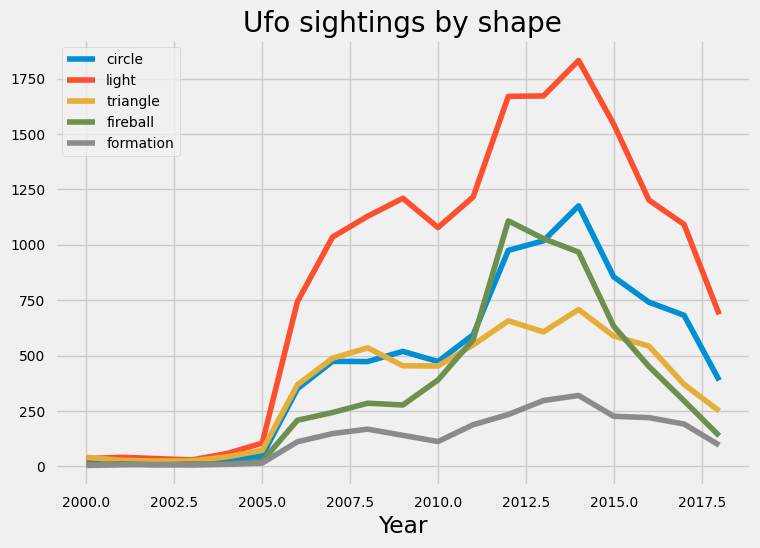

In [101]:
circle.plot(label = "circle")
light.plot(label = "light")
triangle.plot(label = "triangle")
fireball.plot(label = "fireball")
formation.plot(label = "formation")
plt.title("Ufo sightings by shape")
plt.xlabel("Year")
plt.legend()

<h3> Pandas automatic subplots</h3>

In [103]:
df.head(1)

,BasePay,OvertimePay,OtherPay
EmployeeName,,,
NATHANIEL FORD,167411.18,0.0,400184.25


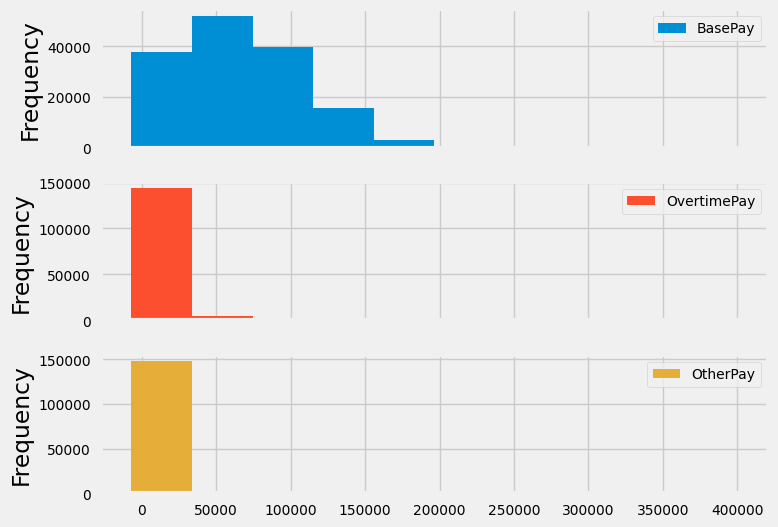

In [110]:
df.plot(kind = "hist", subplots = True) ## for a df, if we put in the param subplots  = True it will automatically create 3 new subplot

plt.tight_layout()
plt.show()

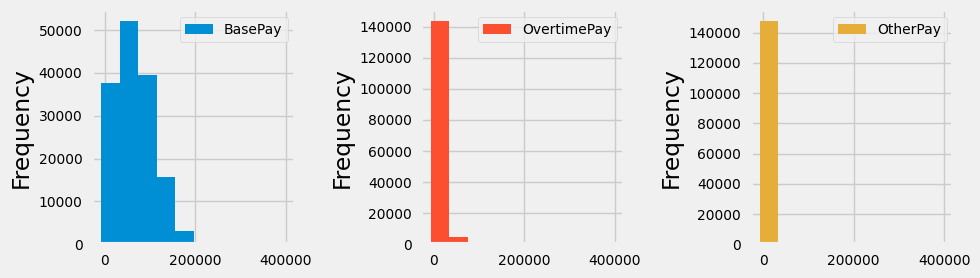

In [112]:
## can also define how many columns, rows we want 

df.plot(kind = "hist", subplots = True, layout = (1,3), figsize = (10,3)) 

plt.tight_layout()
plt.show()

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

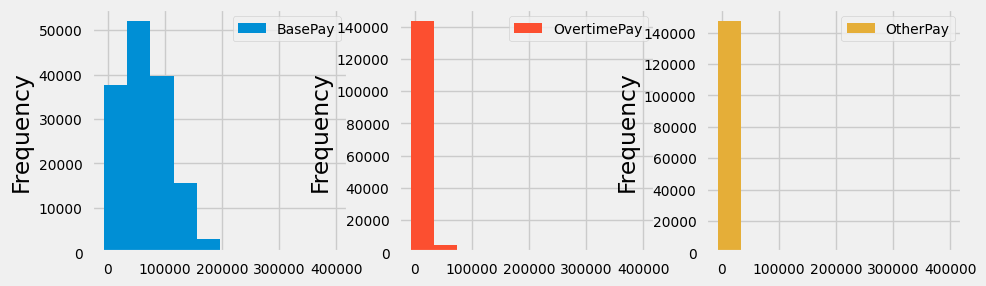

In [113]:
## we can even access any of the above charts individually

df.plot(kind = "hist", subplots = True, layout = (1,3), figsize = (10,3)) 
##this function call returns a nested array and to access the last one we have to do [0][2]


Text(0.5, 1.0, 'Hi')

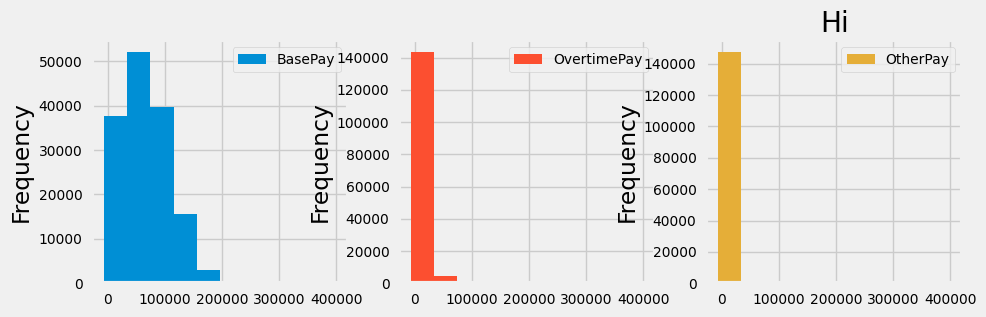

In [124]:
axs = df.plot(kind = "hist", subplots = True, layout = (1,3), figsize = (10,3)) 

axs[0][2].set_title("Hi")
##axs[0][2].set_xlim(0,20000)

<h3> Manual subplots with pandas</h3>

<Axes: xlabel='year'>

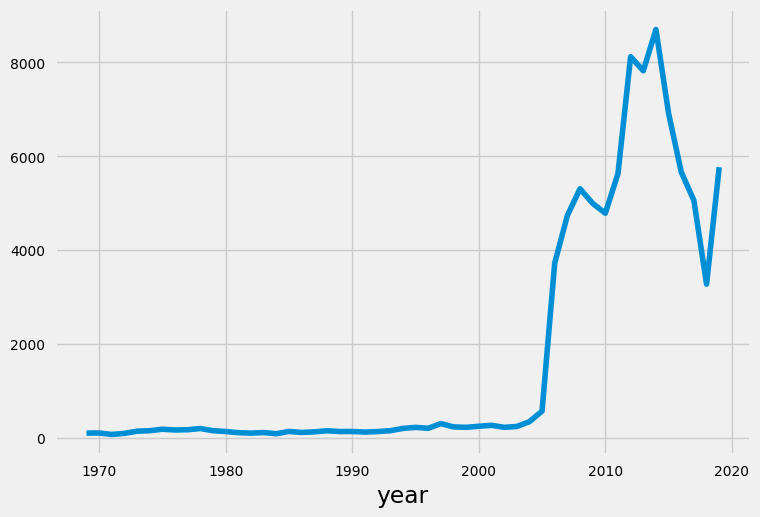

In [127]:
ufo.year.value_counts().sort_index().plot()

<Axes: xlabel='month'>

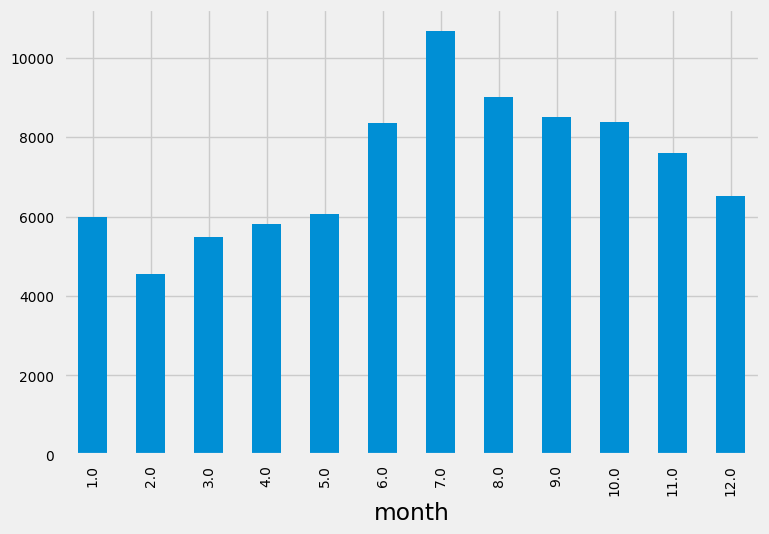

In [129]:
ufo.month.value_counts().sort_index().plot(kind = "bar")

<Axes: xlabel='month'>

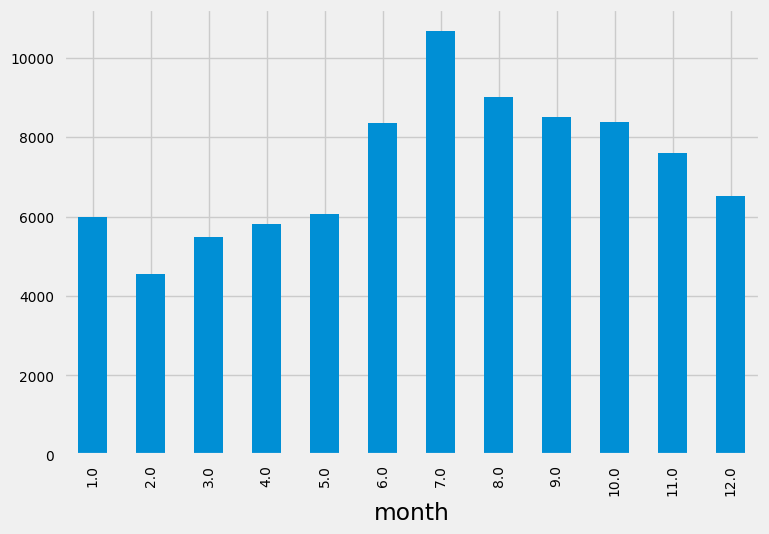

In [130]:
ufo.year.value_counts().sort_index().plot()
ufo.month.value_counts().sort_index().plot(kind = "bar")

Text(0.5, 1.0, 'Sighitings by Monht')

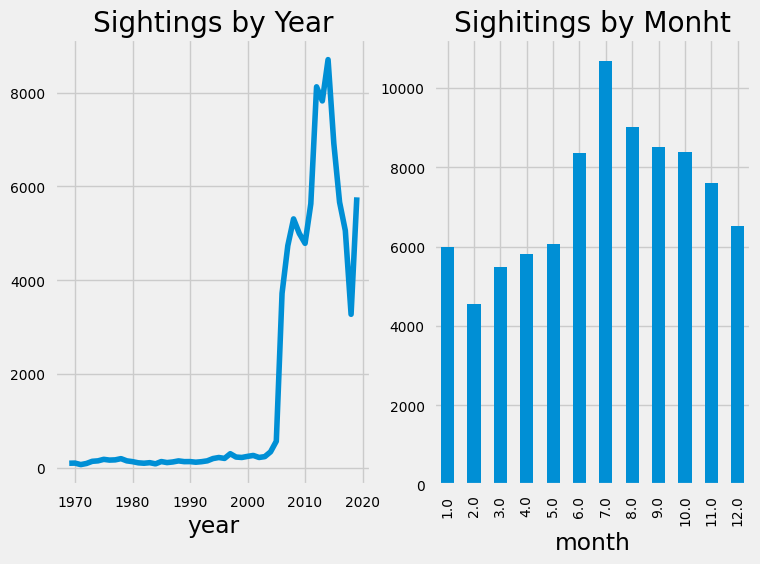

In [138]:

fig , axs = plt.subplots(1,2)
ufo.year.value_counts().sort_index().plot(ax = axs[0])
axs[0].set_title("Sightings by Year")
ufo.month.value_counts().sort_index().plot(kind = "bar", ax = axs[1]) ## will print on 0 and 1st index value of the new subplots defined
axs[1].set_title("Sighitings by Monht")